In [1]:
# Thamys Abrahao - 06/2018
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize':(7.7,7.7)}) # graph size

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
df_ = pd.read_csv('base_analise_PasseiDireto.csv')

In [4]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 34 columns):
City                       19830 non-null object
CourseName                 60000 non-null object
StudentId                  60000 non-null int64
RegisteredDate             60000 non-null object
SignupSource               60000 non-null object
State                      24239 non-null object
StudentClient              51581 non-null object
UniversityName             60000 non-null object
Qnt_QuestionSnippet        2240 non-null float64
NumberofSessions           60000 non-null int64
Pagantes                   1983 non-null float64
Churn                      768 non-null float64
AnswerSnippet              3068 non-null float64
Qnt_textBookSolutions      5790 non-null float64
Qnt_subjects               57229 non-null float64
Qnt_fileviews              56164 non-null float64
Answer_Dislike             14402 non-null float64
Answer_Like                14402 non-null float64
BookSolu

# Separando apenas a base que era assinante - assim pegaremos os usuários que 'churnearam'

In [5]:
df = df_[df_.Pagantes == 1]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 59720
Data columns (total 34 columns):
City                       928 non-null object
CourseName                 1983 non-null object
StudentId                  1983 non-null int64
RegisteredDate             1983 non-null object
SignupSource               1983 non-null object
State                      1415 non-null object
StudentClient              1546 non-null object
UniversityName             1983 non-null object
Qnt_QuestionSnippet        183 non-null float64
NumberofSessions           1983 non-null int64
Pagantes                   1983 non-null float64
Churn                      726 non-null float64
AnswerSnippet              230 non-null float64
Qnt_textBookSolutions      599 non-null float64
Qnt_subjects               1908 non-null float64
Qnt_fileviews              1980 non-null float64
Answer_Dislike             915 non-null float64
Answer_Like                915 non-null float64
BookSolution_Dislike       9

In [7]:
df.loc[:, 'Churn'] = df['Churn'].replace(np.nan, 0)

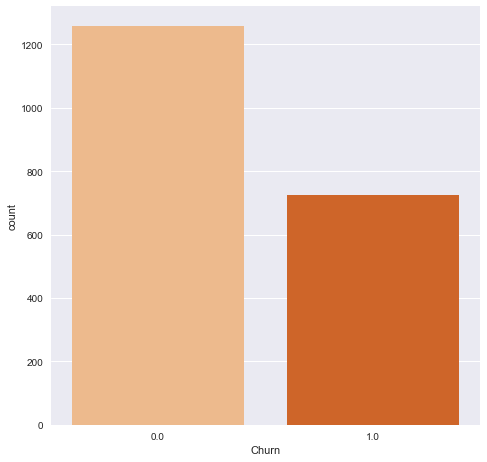

In [8]:
sns.countplot(x='Churn', data=df, palette='Oranges')
plt.savefig('Churn.png', dpi=100);

In [9]:
mean = df.groupby('Churn').mean().reset_index()
mean.drop('StudentId', axis=1, inplace=True)
mean.head()

,Churn,Qnt_QuestionSnippet,NumberofSessions,Pagantes,AnswerSnippet,Qnt_textBookSolutions,Qnt_subjects,Qnt_fileviews,Answer_Dislike,Answer_Like,BookSolution_Dislike,BookSolution_Like,Book_Like,Comment_Dislike,Comment_Like,File_Dislike,File_Like,Premium Content_Dislike,Premium Content_Like,Question_Dislike,Question_Like,Subject_Like,Video_Dislike,Video_Like,Dislike,Like
0,0.0,1.785714,77.384248,1.0,2.101911,5.898017,8.183908,280.586454,0.006791,0.174873,0.001698,0.057725,0.001698,0.000000,0.789474,0.376910,6.196944,0.027165,0.196944,0.039049,0.344652,0.0,0.005093,0.050934,0.456706,7.813243
1,1.0,2.947368,72.413223,1.0,3.369863,6.556911,7.400000,208.544828,0.024540,0.582822,0.003067,0.058282,0.009202,0.003067,2.552147,0.226994,8.389571,0.015337,0.638037,0.021472,0.457055,0.0,0.000000,0.033742,0.294479,12.720859


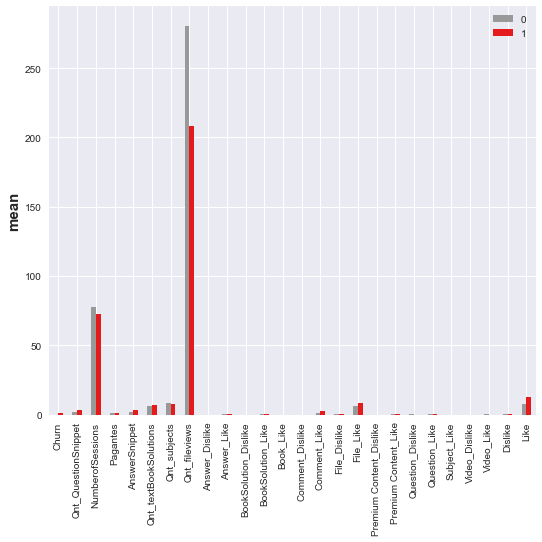

In [10]:
mean.T.plot(kind='bar', colormap='Set1_r')
plt.xlabel('', fontweight='bold', fontsize=15) 
plt.ylabel('mean', fontweight='bold', fontsize=15);
plt.tight_layout()
plt.savefig('mean_churn.png', dpi=100)

In [11]:
mean2 = df.groupby('Churn').mean().reset_index()
mean2.drop('StudentId', axis=1, inplace=True)
mean2.drop('Qnt_fileviews', axis=1, inplace=True)
mean2.head()

,Churn,Qnt_QuestionSnippet,NumberofSessions,Pagantes,AnswerSnippet,Qnt_textBookSolutions,Qnt_subjects,Answer_Dislike,Answer_Like,BookSolution_Dislike,BookSolution_Like,Book_Like,Comment_Dislike,Comment_Like,File_Dislike,File_Like,Premium Content_Dislike,Premium Content_Like,Question_Dislike,Question_Like,Subject_Like,Video_Dislike,Video_Like,Dislike,Like
0,0.0,1.785714,77.384248,1.0,2.101911,5.898017,8.183908,0.006791,0.174873,0.001698,0.057725,0.001698,0.000000,0.789474,0.376910,6.196944,0.027165,0.196944,0.039049,0.344652,0.0,0.005093,0.050934,0.456706,7.813243
1,1.0,2.947368,72.413223,1.0,3.369863,6.556911,7.400000,0.024540,0.582822,0.003067,0.058282,0.009202,0.003067,2.552147,0.226994,8.389571,0.015337,0.638037,0.021472,0.457055,0.0,0.000000,0.033742,0.294479,12.720859


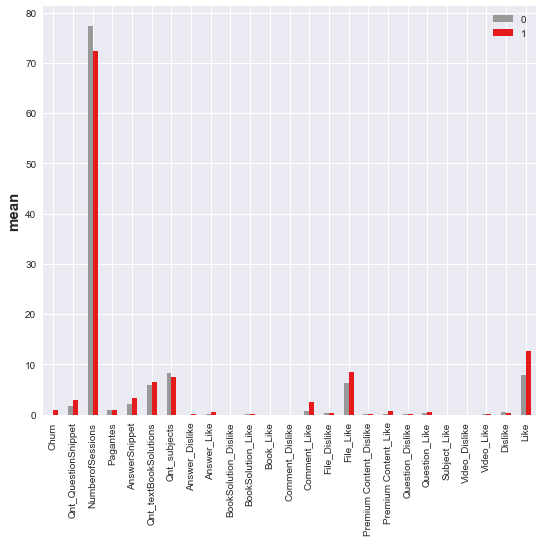

In [12]:
mean2.T.plot(kind='bar', colormap='Set1_r')
plt.xlabel('', fontweight='bold', fontsize=15)
plt.ylabel('mean', fontweight='bold', fontsize=15);
plt.tight_layout()
plt.savefig('mean_churn2.png', dpi=100)

In [13]:
df_churn = df[df.Churn == 1]
print(df_churn.shape)
df_num = df_churn.select_dtypes(include = ['float64', 'int64'])
print(df_num.shape)

(726, 34)
(726, 27)


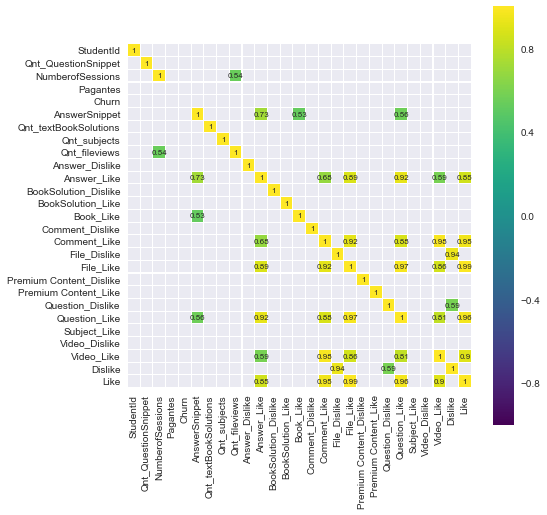

In [14]:
corr = df_num.corr()

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);